# Pandas DataFame 및 Numpy Array를 사용하여 데이터 준비하기

## 1) Loading Data

In [1]:
import urllib
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
raw_csv = urllib.request.urlopen(path)
col_names = range(23)
df = pd.read_csv(raw_csv, names = col_names)
print(len(df))

8124


In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 2) Categorical Attribute를 Numerical Attribute로 변환

In [3]:
num_columns = df.shape[1]
map_dic = {}
for i in range(num_columns):
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic[i] = {}
    for j in range(N):
        map_dic[i][unique_array[j]] = j
    df[i] = df[i].map(map_dic[i])

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


## 3) 각 컬럼별 Normalization

In [5]:
for i in range(1, num_columns):
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic_sub = {}
    for j in range(N):
        if j == 0:
            map_dic_sub[j] = 0
        else:
            map_dic_sub[j] = j / float(N - 1)        
    df[i] = df[i].map(map_dic_sub)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
1,1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.166667
2,1,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.333333
3,0,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
4,1,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.25,0.125,0.4,0.166667


## 4) 데이터 전처리 작업

In [7]:
data_df = df.iloc[:, 1:]

In [8]:
data_df.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.166667
2,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.333333
3,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
4,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,1.0,...,0.0,0.0,0.0,0,0.0,0.0,0.25,0.125,0.4,0.166667


In [9]:
data_array = data_df.as_matrix()

In [10]:
print(type(data_array), data_array.shape)

<class 'numpy.ndarray'> (8124, 22)


In [11]:
label_df = df.iloc[:, 0:1]

In [12]:
label_df.head()

,0
0,0
1,1
2,1
3,0
4,1


In [13]:
label_array = label_df.as_matrix()

In [14]:
print(type(label_array), label_array.shape)

<class 'numpy.ndarray'> (8124, 1)


In [15]:
label_array_one_hot = []
for i in label_array:
    if i == 0:
        one_hot = [1, 0]
    else:
        one_hot = [0, 1]
    label_array_one_hot.append(one_hot) 

In [16]:
label_array_one_hot =  np.array(label_array_one_hot)

In [17]:
print(type(label_array_one_hot), label_array_one_hot.shape)

<class 'numpy.ndarray'> (8124, 2)


In [18]:
train = {'data': None, 'labels': None}
validation = {'data': None, 'labels': None}
test = {'data': None, 'labels': None}

In [19]:
import random
pick = random.random()
train_data = []
train_labels = []
validation_data = []
validation_labels = []
test_data = []
test_labels = []
for i in range(len(data_array)):
    pick = random.random()
    if pick < 0.80:
        train_data.append(data_array[i])
        train_labels.append(label_array_one_hot[i])
    elif pick >= 0.80 and pick < 0.85:
        validation_data.append(data_array[i])
        validation_labels.append(label_array_one_hot[i])
    elif pick >= 0.85:
        test_data.append(data_array[i])
        test_labels.append(label_array_one_hot[i])
        
train['data'] = np.array(train_data)
train['labels'] = np.array(train_labels)
validation['data'] = np.array(validation_data)
validation['labels'] = np.array(validation_labels)
test['data'] = np.array(test_data)
test['labels'] = np.array(test_labels)

In [20]:
print(train['data'].shape, train['labels'].shape)

(6569, 22) (6569, 2)


In [21]:
print(validation['data'].shape, validation['labels'].shape)

(381, 22) (381, 2)


In [22]:
print(test['data'].shape, test['labels'].shape)

(1174, 22) (1174, 2)


# 3. Multi-layer Neural Network 모델 생성 및 테스트하기

In [42]:
batch_size = 100
training_epochs = 10
learning_rate = 0.05

epoch_list = []
train_error_list = []
validation_error_list = []
test_accuracy_list = []
diff_index_list = []

# Network Parameters
n_input = 22 # data input
n_hidden_1 = 11
n_hidden_2 = 11
n_classes = 2 # total classes

# Data Preparation
x = tf.placeholder(tf.float32, [None, n_input])
y_target = tf.placeholder(tf.float32, [None, n_classes])

# Model Construction
# Store layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# 1st Hidden layer with RELU activation
u2 = tf.matmul(x, weights['W1']) + biases['b1']
z2 = tf.nn.relu(u2)

# 2ndHidden layer with RELU activation
u3 = tf.matmul(z2, weights['W2']) + biases['b2']
z3 = tf.nn.relu(u3)

# Output layer with linear activation
u_out = tf.matmul(z3, weights['out']) + biases['out']

# Target Setup
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=u_out, labels=y_target))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

# Accuracy   
prediction_and_ground_truth = tf.equal(tf.argmax(u_out, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_and_ground_truth, tf.float32))

Total batch: 66
Epoch:  0, Train Error: 3.34089, Validation Error: 3.10575, Test Accuracy: 0.56985
Epoch:  1, Train Error: 0.32670, Validation Error: 0.31990, Test Accuracy: 0.86968
Epoch:  2, Train Error: 0.21799, Validation Error: 0.22640, Test Accuracy: 0.92504
Epoch:  3, Train Error: 0.17839, Validation Error: 0.18848, Test Accuracy: 0.94208
Epoch:  4, Train Error: 0.16079, Validation Error: 0.17219, Test Accuracy: 0.94463
Epoch:  5, Train Error: 0.14219, Validation Error: 0.15324, Test Accuracy: 0.95145
Epoch:  6, Train Error: 0.13259, Validation Error: 0.14344, Test Accuracy: 0.95656
Epoch:  7, Train Error: 0.12396, Validation Error: 0.13424, Test Accuracy: 0.96167
Epoch:  8, Train Error: 0.11433, Validation Error: 0.12246, Test Accuracy: 0.95911
Epoch:  9, Train Error: 0.10796, Validation Error: 0.11476, Test Accuracy: 0.96508


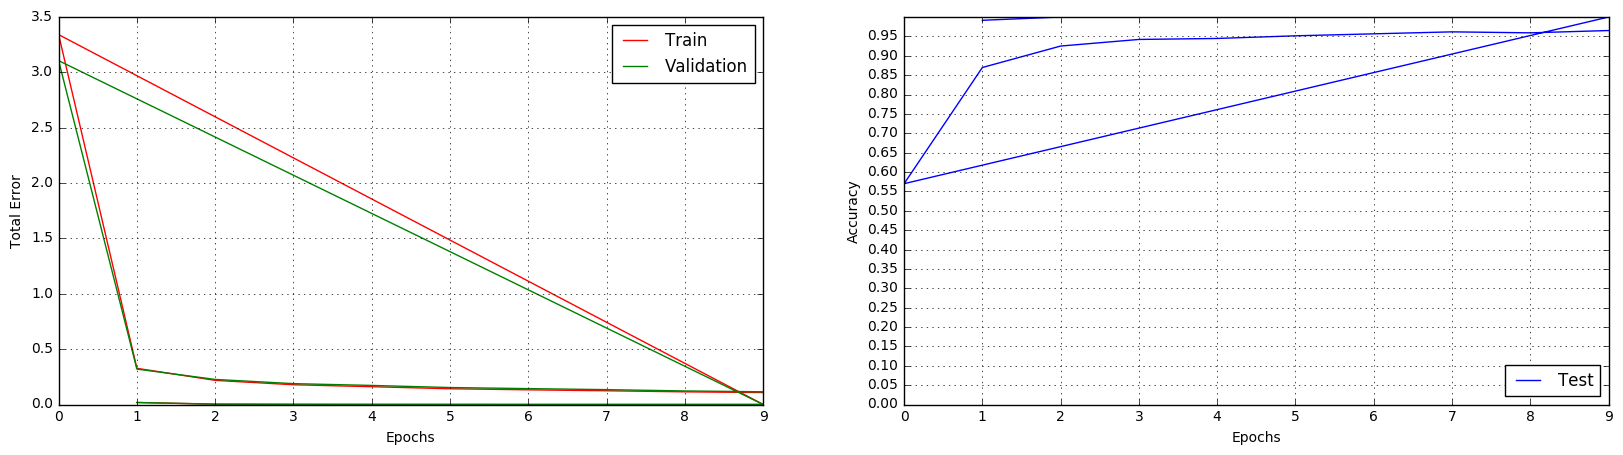

In [44]:
def draw_error_values_and_accuracy():
    # Drag Error Values and Accuracy
    flg = plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(epoch_list[1:], train_error_list[1:], 'r', label='Train')
    plt.plot(epoch_list[1:], validation_error_list[1:], 'g', label="Validation")
    plt.ylabel('Total Error')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend(loc='upper right')
    
    plt.subplot(122)
    plt.plot(epoch_list[1:], test_accuracy_list[1:], 'b', label='Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()

def next_batch(num, data):
    # get all possible indexes
    idx = np.arange(0, len(data['data']))
    
    # shuffle indexes
    np.random.shuffle(idx)
    
    # use only 'num' random indexes
    idx = idx[0:num]
    
    # get list of 'num' random samples
    data_shuffle_data = [data['data'][i] for i in idx]
    data_shuffle_labels = [data['labels'][i] for i in idx]

    # get back numpy array
    data_shuffle_data = np.asarray(data_shuffle_data)
    data_shuffle_labels = np.asarray(data_shuffle_labels)
    
    return data_shuffle_data, data_shuffle_labels


with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    total_batch = int(math.ceil(len(train['data'])/float(batch_size)))
    print("Total batch: %d" % total_batch)
    
    for epoch in range(training_epochs):
        epoch_list.append(epoch)
        
        # Train Error Value
        train_error_value = sess.run(error, feed_dict={x: train['data'], y_target: train['labels']})
        train_error_list.append(train_error_value)
        
        validation_error_value = sess.run(error, feed_dict={x: validation['data'], y_target: validation['labels']})
        validation_error_list.append(validation_error_value)
        
        test_accuracy_value = sess.run(accuracy, feed_dict={x: test['data'], y_target: test['labels']})
        test_accuracy_list.append(test_accuracy_value)
        print ("Epoch: {0:2d}, Train Error: {1:0.5f}, Validation Error: {2:0.5f}, Test Accuracy: {3:0.5f}".format(epoch, train_error_value, validation_error_value, test_accuracy_value))
        
        for i in range(total_batch):
            batch_images, batch_labels = next_batch(batch_size, train)
            
            # batch_images = train['data'][i*batch_size:(i+1)*batch_size]
            # batch_labels = train['labels'][i*batch_size:(i+1)*batch_size]
            
            sess.run(optimizer, feed_dict={x: batch_images, y_target: batch_labels})
            
    draw_error_values_and_accuracy()